In [7]:
library(qvalue)
library(dplyr)
library(ggplot2)

In [8]:
### DA D52 untreated

In [16]:
#### Model 0
# Covs = PCs
# random effect: ncells noise matrix
filename0 = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/qtl_analysis/eqtl_discovery_separated_by_treatment/input_files_untreated/celltype_DA/top_qtl_results_all.txt"
myfile0 = read.csv(filename0,sep="\t")
nrow(myfile0)
head(myfile0,2)

myfile0$q_value = qvalue(myfile0$empirical_feature_p_value)$qvalues
length(unique(myfile0[myfile0$q_value < 0.05,'feature_id']))

[1] 12044

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id
5_6605829_G_T,4.526650e-04,0.2143554,0.06111680,0.3137267,5,6599352,6633404,175,175,0.5234127,210.2815,5,6605829,T,1,0.4657143,1.000000,ENSG00000037474
5_7344998_A_T,3.154604e-05,0.3821088,0.09180874,0.1073642,5,7396321,7830194,175,175,0.4945272,274.1518,5,7344998,T,1,0.1200000,0.717637,ENSG00000078295


[1] 1024

In [17]:
#### Model 1
# only one replicate per line (one pool)
# Covs = pool + sex (no PCs)
# random effect: ncells noise matrix
filename1 = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_untreated/celltype_DA/extra_runs_addressing_reviews2/results/qtl_results_all.txt"

# myfile1 = read.csv(filename1,sep="\t")
nrow(myfile1)
head(myfile1,2)

[1] 13639086

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p
ENSG00000170889,19_54709277_C_A,3.956161e-09,-0.4009022,0.06811097,0.0004000482,19,54704610,54752862,175,175,0.5758469,260.2439,19,54709277,A,1,0.18,0.6066207
ENSG00000170889,19_54714594_T_C,3.956161e-09,-0.4009022,0.06811097,0.0004000482,19,54704610,54752862,175,175,0.5758469,260.2439,19,54714594,C,1,0.18,0.6066207


Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”

[1] 12100

[1] 0.9629858


	Pearson's product-moment correlation

data:  df$beta.PCs and df$beta.batch
t = 392.95, df = 12098, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9616686 0.9642586
sample estimates:
      cor 
0.9629858 


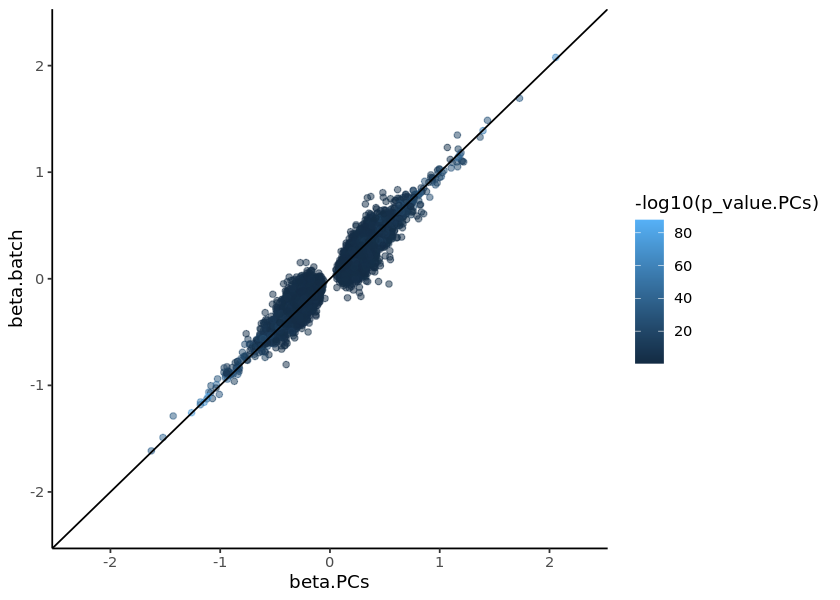

In [15]:
df = inner_join(myfile0, myfile1, by = c("snp_id","feature_id"), suffix = c(".PCs",".batch"))
nrow(df)
### effect sizes
cor(df$beta.PCs, df$beta.batch)
cor.test(df$beta.PCs, df$beta.batch)

options(repr.plot.width=7, repr.plot.height=5)
ggplot(df, aes(x = beta.PCs, y = beta.batch, colour = -log10(p_value.PCs))) + geom_point(alpha = 0.5) + 
    geom_abline(intercept = 0) + xlim(c(-2.3,2.3)) + ylim(c(-2.3,2.3)) + theme_classic()

[1] 0.9227659


	Pearson's product-moment correlation

data:  df$p_value.PCs and df$p_value.batch
t = 30.263, df = 12098, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2486363 0.2817655
sample estimates:
      cor 
0.2652792 


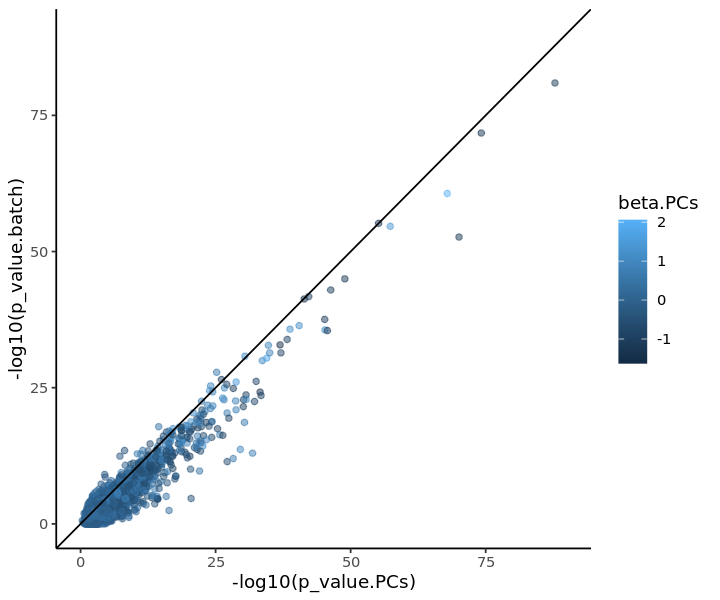

In [18]:
### p values
cor(-log10(df$p_value.PCs), -log10(df$p_value.batch))
cor.test(df$p_value.PCs, df$p_value.batch)

options(repr.plot.width=6, repr.plot.height=5)
ggplot(df, aes(x = -log10(p_value.PCs), y = -log10(p_value.batch), colour = beta.PCs)) + geom_point(alpha = 0.5) + 
        geom_abline(intercept = 0) + xlim(c(0,90)) + ylim(c(0,90)) + theme_classic()

In [19]:
#### Model 2
# Covs = pool (no PCs) 
# random effect: population structure (no ncells noise matrix)
filename2 = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_untreated/celltype_DA/extra_runs_addressing_reviews/results/qtl_results_all.txt"
myfile2 = read.csv(filename2,sep="\t")
head(myfile2,2)

myfile2$q_value = qvalue(myfile2$empirical_feature_p_value)$qvalues
length(unique(myfile2[myfile2$q_value < 0.05,'feature_id']))

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p
ENSG00000170889,19_54704768_C_T,7.222155e-08,-0.4156453,0.07717781,0.006607823,19,54704610,54752862,202,202,0.4706659,250.106,19,54704768,T,1,0.1732673,0.4598646
ENSG00000170889,19_54708430_A_G,7.222155e-08,-0.4156453,0.07717781,0.006607823,19,54704610,54752862,202,202,0.4706659,250.106,19,54708430,G,1,0.1732673,0.4598646


[1] 169

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”

[1] 0.9212765


	Pearson's product-moment correlation

data:  df$beta.PCs and df$beta.batch
t = 257.97, df = 11859, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9185086 0.9239541
sample estimates:
      cor 
0.9212765 


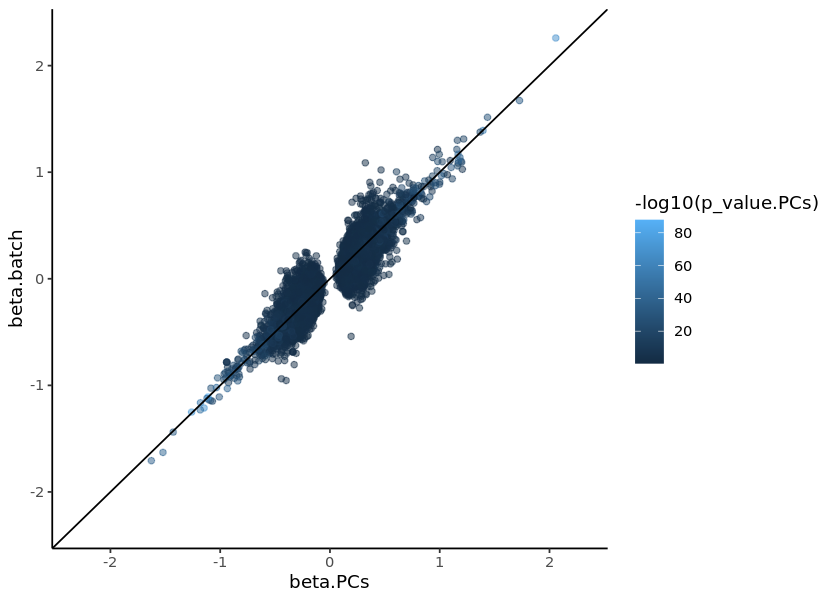

In [26]:
df = inner_join(myfile0, myfile2, by = c("snp_id","feature_id"), suffix = c(".PCs",".batch"))
### effect sizes
cor(df$beta.PCs, df$beta.batch)
cor.test(df$beta.PCs, df$beta.batch)

options(repr.plot.width=7, repr.plot.height=5)
ggplot(df, aes(x = beta.PCs, y = beta.batch, colour = -log10(p_value.PCs))) + geom_point(alpha = 0.5) + 
    geom_abline(intercept = 0) + xlim(c(-2.3,2.3)) + ylim(c(-2.3,2.3)) + theme_classic()

[1] 0.8959662


	Pearson's product-moment correlation

data:  df$p_value.PCs and df$p_value.batch
t = 23.276, df = 11859, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.1917454 0.2261669
sample estimates:
      cor 
0.2090209 


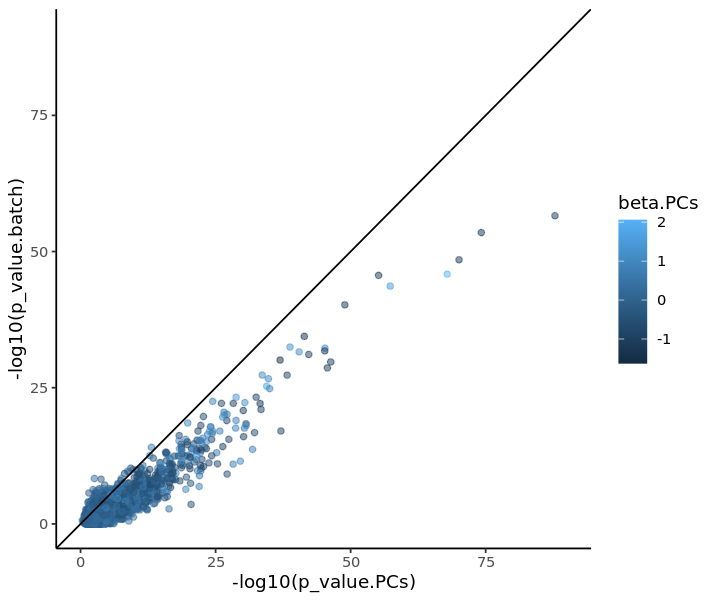

In [27]:
### p values
cor(-log10(df$p_value.PCs), -log10(df$p_value.batch))
cor.test(df$p_value.PCs, df$p_value.batch)

options(repr.plot.width=6, repr.plot.height=5)
ggplot(df, aes(x = -log10(p_value.PCs), y = -log10(p_value.batch), colour = beta.PCs)) + geom_point(alpha = 0.5) + 
        geom_abline(intercept = 0) + xlim(c(0,90)) + ylim(c(0,90)) + theme_classic()

In [21]:
#### Model 3
# Covs = 15 PCs
# random effect: population structure (no ncells noise matrix)
filename3 = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_untreated/celltype_DA/extra_runs_addressing_reviews4/results/qtl_results_all.txt"
myfile3 = read.csv(filename3,sep="\t")
head(myfile3,2)

myfile3$q_value = qvalue(myfile3$empirical_feature_p_value)$qvalues
length(unique(myfile3[myfile3$q_value < 0.05,'feature_id']))

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p
ENSG00000170889,19_54701720_T_C,9.485777e-14,-0.3321639,0.04459850,3.361553e-07,19,54704610,54752862,202,202,0.6775356,231.7542,19,54701720,C,1,0.3465347,0.2761859
ENSG00000170889,19_54704768_C_T,1.190448e-12,-0.4266572,0.06003781,1.586376e-06,19,54704610,54752862,202,202,0.6775356,231.7542,19,54704768,T,1,0.1732673,0.4598646


[1] 241

In [ ]:
df = inner_join(myfile0, myfile3, by = c("snp_id","feature_id"), suffix = c(".PCs",".batch"))
### effect sizes
cor(df$beta.PCs, df$beta.batch)
cor.test(df$beta.PCs, df$beta.batch)

options(repr.plot.width=7, repr.plot.height=5)
ggplot(df, aes(x = beta.PCs, y = beta.batch, colour = -log10(p_value.PCs))) + geom_point(alpha = 0.5) + 
    geom_abline(intercept = 0) + xlim(c(-2.3,2.3)) + ylim(c(-2.3,2.3)) + theme_classic()

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”

[1] 0.9471366


	Pearson's product-moment correlation

data:  df$beta.PCs and df$beta.batch
t = 321.49, df = 11859, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.945252 0.948958
sample estimates:
      cor 
0.9471366 


[1] 0.9180307


	Pearson's product-moment correlation

data:  df$p_value.PCs and df$p_value.batch
t = 27.327, df = 11859, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2263912 0.2602532
sample estimates:
      cor 
0.2433964 


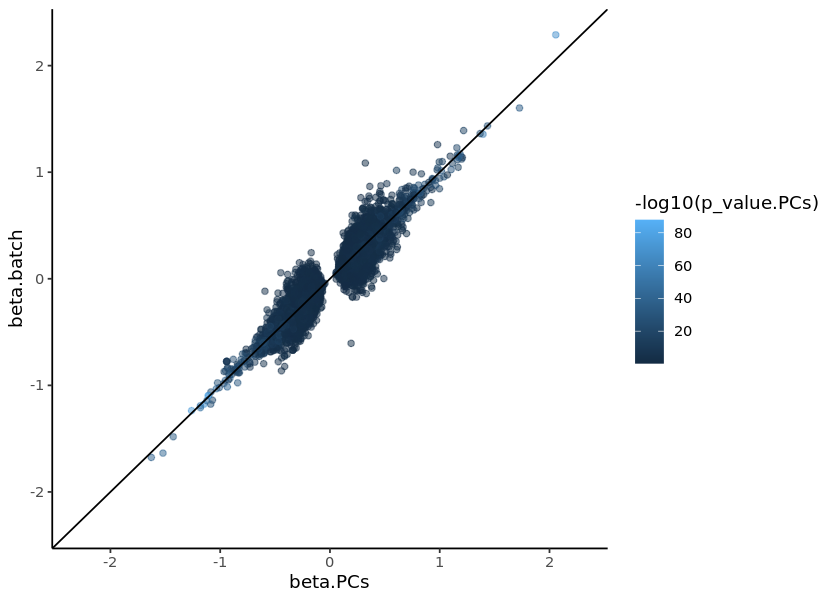

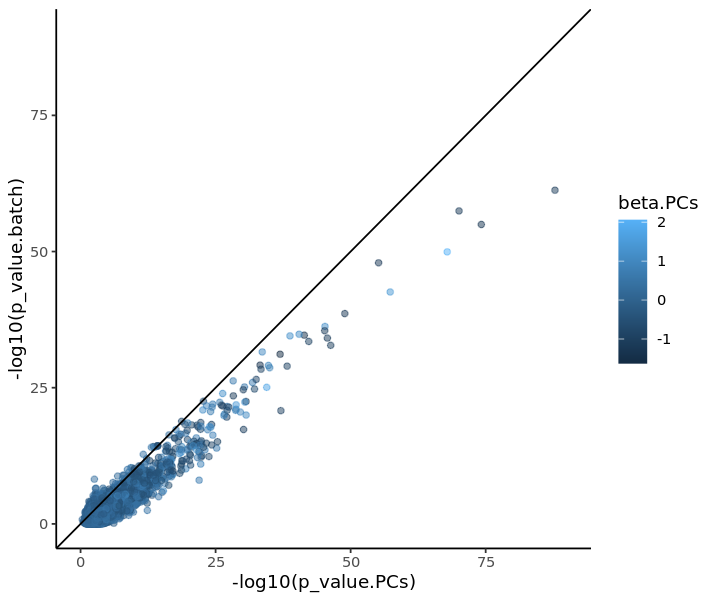

In [22]:
### p values
cor(-log10(df$p_value.PCs), -log10(df$p_value.batch))
cor.test(df$p_value.PCs, df$p_value.batch)

options(repr.plot.width=6, repr.plot.height=5)
ggplot(df, aes(x = -log10(p_value.PCs), y = -log10(p_value.batch), colour = beta.PCs)) + geom_point(alpha = 0.5) + 
        geom_abline(intercept = 0) + xlim(c(0,90)) + ylim(c(0,90)) + theme_classic()

In [23]:
#### Model 4
# Covs = pool (no PCs) 
# random effect: population structure + ncells noise matrix
filename4 = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_untreated/celltype_DA/extra_runs_addressing_reviews6/results/qtl_results_all.txt"
myfile4 = read.csv(filename4,sep="\t")
head(myfile4,2)

myfile4$q_value = qvalue(myfile4$empirical_feature_p_value)$qvalues
length(unique(myfile4[myfile4$q_value < 0.05,'feature_id']))

feature_id,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,rho,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p
ENSG00000170889,19_54705207_G_A,7.047371e-08,0.4148968,0.07697587,0.00420291,19,54704610,54752862,202,202,0.5127127,260.304,0.1,19,54705207,A,1,0.1732673,0.4598646
ENSG00000170889,19_54704768_C_T,7.047371e-08,-0.4148968,0.07697587,0.00420291,19,54704610,54752862,202,202,0.5127127,260.304,0.1,19,54704768,T,1,0.1732673,0.4598646


[1] 404

Warning message:
“Column `snp_id` joining factors with different levels, coercing to character vector”

[1] 0.9666746


	Pearson's product-moment correlation

data:  df$beta.PCs and df$beta.batch
t = 410.95, df = 11845, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9654734 0.9678346
sample estimates:
      cor 
0.9666746 


[1] 0.9111748


	Pearson's product-moment correlation

data:  df$p_value.PCs and df$p_value.batch
t = 30.418, df = 11845, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.2523889 0.2857951
sample estimates:
      cor 
0.2691729 


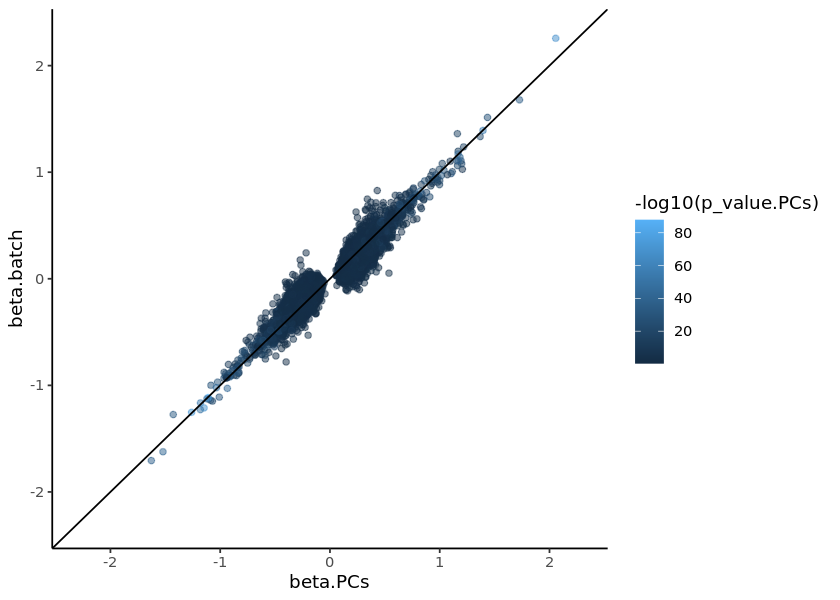

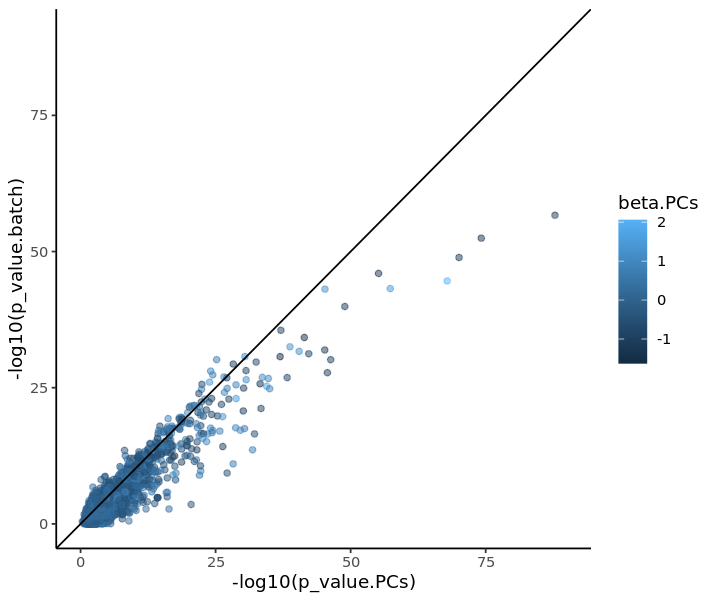

In [25]:
df = inner_join(myfile0, myfile4, by = c("snp_id","feature_id"), suffix = c(".PCs",".batch"))
### effect sizes
cor(df$beta.PCs, df$beta.batch)
cor.test(df$beta.PCs, df$beta.batch)

options(repr.plot.width=7, repr.plot.height=5)
ggplot(df, aes(x = beta.PCs, y = beta.batch, colour = -log10(p_value.PCs))) + geom_point(alpha = 0.5) + 
    geom_abline(intercept = 0) + xlim(c(-2.3,2.3)) + ylim(c(-2.3,2.3)) + theme_classic()

### p values
cor(-log10(df$p_value.PCs), -log10(df$p_value.batch))
cor.test(df$p_value.PCs, df$p_value.batch)

options(repr.plot.width=6, repr.plot.height=5)
ggplot(df, aes(x = -log10(p_value.PCs), y = -log10(p_value.batch), colour = beta.PCs)) + geom_point(alpha = 0.5) + 
        geom_abline(intercept = 0) + xlim(c(0,90)) + ylim(c(0,90)) + theme_classic()

In [ ]:
#### Model 5
# Covs = 15 PCs
# random effect: population structure + ncells noise matrix
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_untreated/celltype_DA/extra_runs_addressing_reviews5/results/qtl_results_all.txt"

In [24]:

# Covs = batch + ncells (no PCs) - new version no ncells
# random effect: population structure (no ncells noise matrix)
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_untreated/celltype_DA/extra_runs_addressing_reviews/results/top_qtl_results_all.txt"
# filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_untreated/celltype_DA/extra_runs_addressing_reviews/results_archive_20200919/top_qtl_results_all.txt"

In [21]:
### DA D52 untreated
# only one replicate per line (one pool)
# Covs = batch + sex (no PCs)
# random effect: ncells noise matrix
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_untreated/celltype_DA/extra_runs_addressing_reviews2/results/top_qtl_results_all.txt"
# filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_untreated/celltype_DA/extra_runs_addressing_reviews2/results_archive_20200919/top_qtl_results_all.txt"

In [48]:
# ### DA D52 untreated
# # only one replicate per line (one pool)
# # Covs = batch + sex + age (no PCs) -> 153/175 lines
# # random effect: ncells noise matrix
# filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_untreated/celltype_DA/extra_runs_addressing_reviews3/results/top_qtl_results_all.txt"

In [27]:
### DA D52 untreated
# Covs = 15 PCs
# random effect: population structure (no ncells noise matrix)
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_untreated/celltype_DA/extra_runs_addressing_reviews4/results/top_qtl_results_all.txt"
# filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_untreated/celltype_DA/extra_runs_addressing_reviews4/results_archive_20200919/top_qtl_results_all.txt"

In [97]:
### DA D52 untreated
# Covs = 15 PCs
# random effect: population structure + ncells noise matrix
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_untreated/celltype_DA/extra_runs_addressing_reviews5/results/top_qtl_results_all.txt"

In [6]:
### DA D52 untreated
# Covs = pool
# random effect: population structure + ncells noise matrix
filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_untreated/celltype_DA/extra_runs_addressing_reviews6/results/top_qtl_results_all.txt"

In [28]:
myfile = read.csv(filename,sep="\t")
head(myfile,2)

# myfile$global_corr_p_value = p.adjust(myfile$empirical_feature_p_value, method = "BH")
# nrow(myfile[myfile$global_corr_p_value < 0.05,])
myfile$q_value = qvalue(myfile$empirical_feature_p_value)$qvalues
length(unique(myfile[myfile$q_value < 0.05,'feature_id']))

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id
19_54854985_C_A,2.245661e-03,0.4751356,0.1554936,0.58260183,19,54641444,54659419,202,202,0.6399655,202.9670,19,54854985,A,1,0.06683168,0.04584349,ENSG00000088038
19_54224827_A_G,4.893919e-05,-0.4063564,0.1000721,0.08422001,19,54412589,54447195,202,202,0.6712116,212.5973,19,54224827,G,1,0.26237624,0.85636192,ENSG00000105605


[1] 471

In [3]:
# filename2 = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/timepoint_D52/input_files_untreated/celltype_DA/results/top_qtl_results_all.txt"
filename2 = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/qtl_analysis/eqtl_discovery_separated_by_treatment/input_files_untreated/celltype_DA/top_qtl_results_all.txt"
myfile2 = read.csv(filename2,sep="\t")
head(myfile2,2)

# myfile2$global_corr_p_value = p.adjust(myfile2$empirical_feature_p_value, method = "BH")
# nrow(myfile2[myfile2$global_corr_p_value < 0.05,])
myfile2$q_value = qvalue(myfile2$empirical_feature_p_value)$qvalues
length(unique(myfile2[myfile2$q_value < 0.05,'feature_id']))

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id
5_6605829_G_T,4.526650e-04,0.2143554,0.06111680,0.3137267,5,6599352,6633404,175,175,0.5234127,210.2815,5,6605829,T,1,0.4657143,1.000000,ENSG00000037474
5_7344998_A_T,3.154604e-05,0.3821088,0.09180874,0.1073642,5,7396321,7830194,175,175,0.4945272,274.1518,5,7344998,T,1,0.1200000,0.717637,ENSG00000078295


[1] 1024

In [7]:
library(dplyr)
library(ggplot2)
df = inner_join(myfile2, myfile, by = c("snp_id","feature_id"), suffix = c(".PCs",".batch"))


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



ERROR: Error in tbl_vars(y): object 'myfile' not found


In [104]:
head(df,2)

snp_id,p_value.PCs,beta.PCs,beta_se.PCs,empirical_feature_p_value.PCs,feature_chromosome.PCs,feature_start.PCs,feature_end.PCs,n_samples.PCs,n_e_samples.PCs,...,beta_param.batch,rho,snp_chromosome.batch,snp_position.batch,assessed_allele.batch,call_rate.batch,maf.batch,hwe_p.batch,global_corr_p_value.batch,q_value.batch
5_10770964_G_A,1.723155e-04,-0.2123951,0.05654089,0.14772276,5,10679342,10761384,175,175,...,203.0537,0,5,10770964,A,1,0.3712871,0.01018476,0.3866605,0.2136906
5_7953623_A_G,1.135478e-05,-0.2737306,0.06235859,0.03099833,5,7851299,7906138,175,175,...,143.7092,0,5,7953623,G,1,0.2351485,0.24717186,0.4672657,0.2582377


In [29]:
genes = unique(myfile[myfile$q_value < 0.05,'feature_id'])
genes2 = unique(myfile2[myfile2$q_value < 0.05,'feature_id'])
length(genes[genes %in% genes2])
length(genes[!(genes %in% genes2)])
length(genes2[!(genes2 %in% genes)])

[1] 457

[1] 14

[1] 567

In [17]:
cor(df$beta.PCs, df$beta.batch)
cor.test(df$beta.PCs, df$beta.batch)

[1] 0.9875835


	Pearson's product-moment correlation

data:  df$beta.PCs and df$beta.batch
t = 333.6, df = 2816, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9866377 0.9884627
sample estimates:
      cor 
0.9875835 


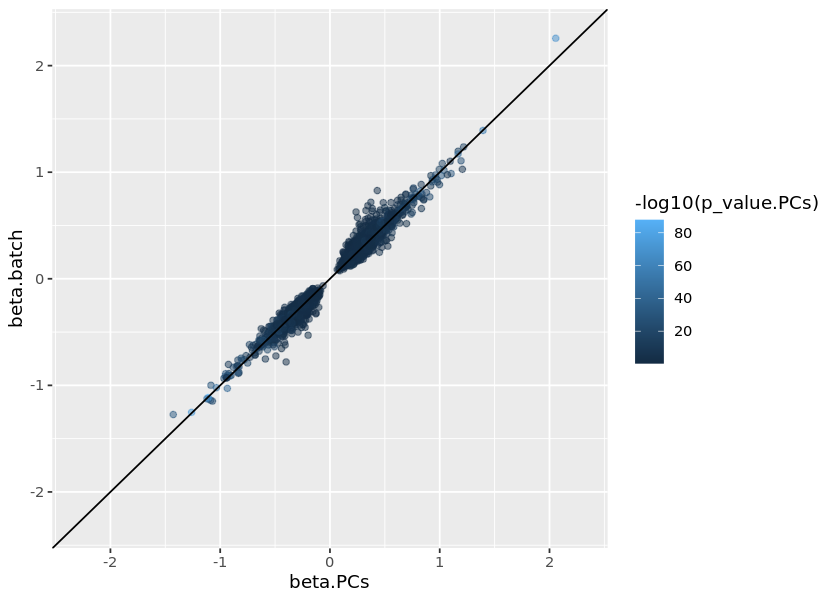

In [18]:
options(repr.plot.width=7, repr.plot.height=5)
ggplot(df, aes(x = beta.PCs, y = beta.batch, colour = -log10(p_value.PCs))) + geom_point(alpha = 0.5) + 
    geom_abline(intercept = 0) + xlim(c(-2.3,2.3)) + ylim(c(-2.3,2.3))

In [19]:
cor(-log10(df$p_value.PCs), -log10(df$p_value.batch))
cor.test(df$p_value.PCs, df$p_value.batch)

[1] 0.9471164


	Pearson's product-moment correlation

data:  df$p_value.PCs and df$p_value.batch
t = 59.849, df = 2816, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7315231 0.7640517
sample estimates:
      cor 
0.7482367 


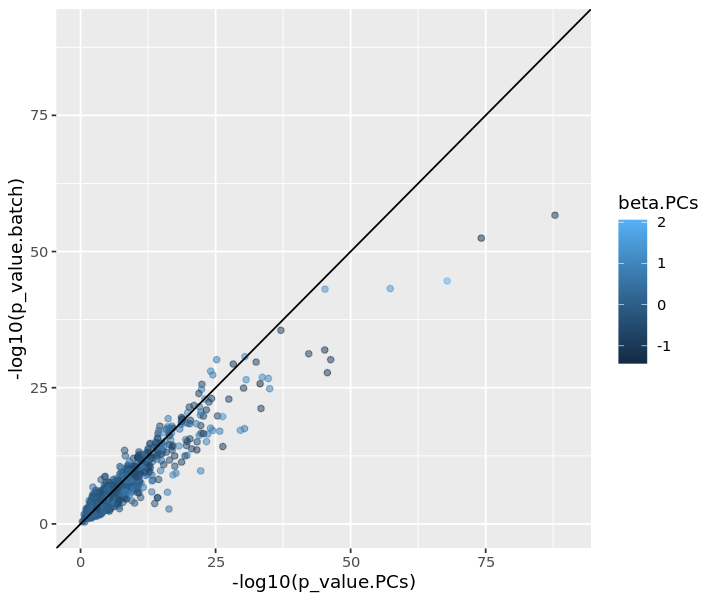

In [20]:
options(repr.plot.width=6, repr.plot.height=5)
ggplot(df, aes(x = -log10(p_value.PCs), y = -log10(p_value.batch), colour = beta.PCs)) + geom_point(alpha = 0.5) + 
        geom_abline(intercept = 0) + xlim(c(0,90)) + ylim(c(0,90))

In [43]:
#####

In [49]:
cor(df$beta.PCs, df$beta.batch)
cor.test(df$beta.PCs, df$beta.batch)

[1] 0.9672949


	Pearson's product-moment correlation

data:  df$beta.PCs and df$beta.batch
t = 130.22, df = 1166, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9633876 0.9707915
sample estimates:
      cor 
0.9672949 


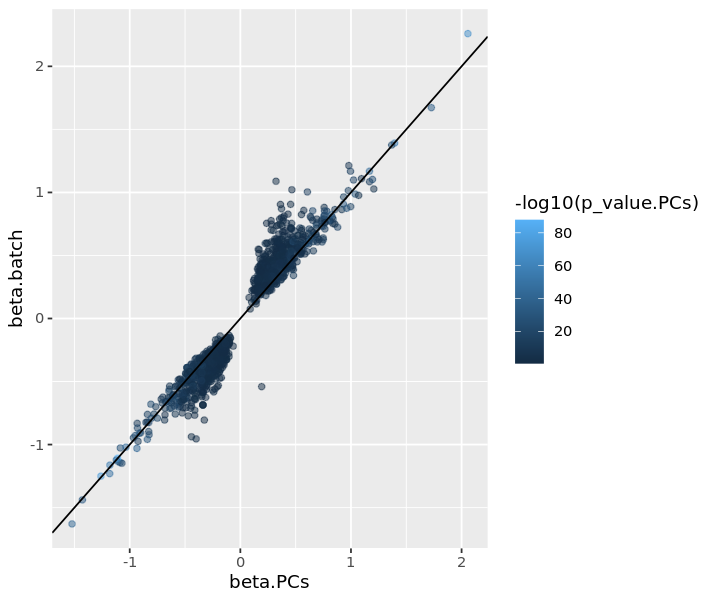

In [50]:
ggplot(df, aes(x = beta.PCs, y = beta.batch, colour = -log10(p_value.PCs))) + 
geom_point(alpha = 0.5) + geom_abline(intercept = 0)

In [51]:
cor(-log10(df$p_value.PCs), -log10(df$p_value.batch))
cor.test(df$p_value.PCs, df$p_value.batch)

[1] 0.9497887


	Pearson's product-moment correlation

data:  df$p_value.PCs and df$p_value.batch
t = 20.015, df = 1166, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4617064 0.5471635
sample estimates:
      cor 
0.5056743 


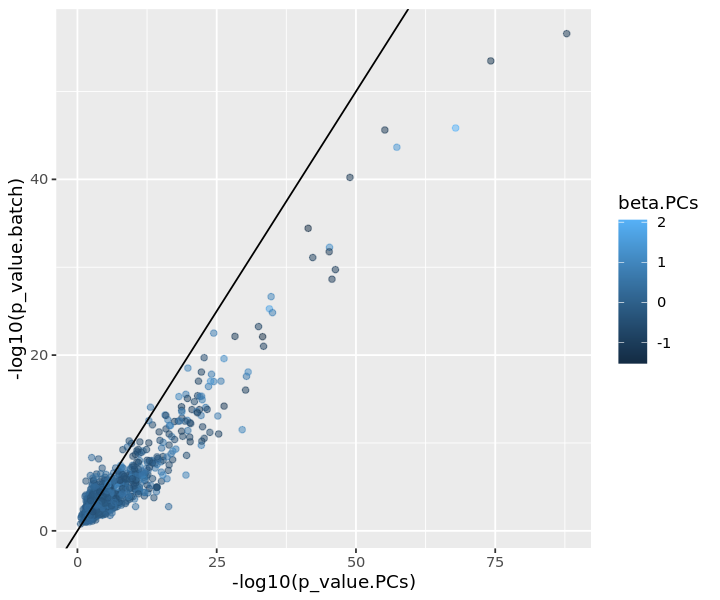

In [52]:
ggplot(df, aes(x = -log10(p_value.PCs), y = -log10(p_value.batch), colour = beta.PCs)) + geom_point(alpha = 0.5) + geom_abline(intercept = 0)

In [ ]:
##################

In [63]:
cor(df$beta.PCs, df$beta.batch)
cor.test(df$beta.PCs, df$beta.batch)

[1] 0.9757831


	Pearson's product-moment correlation

data:  df$beta.PCs and df$beta.batch
t = 175.29, df = 1544, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9732757 0.9780579
sample estimates:
      cor 
0.9757831 


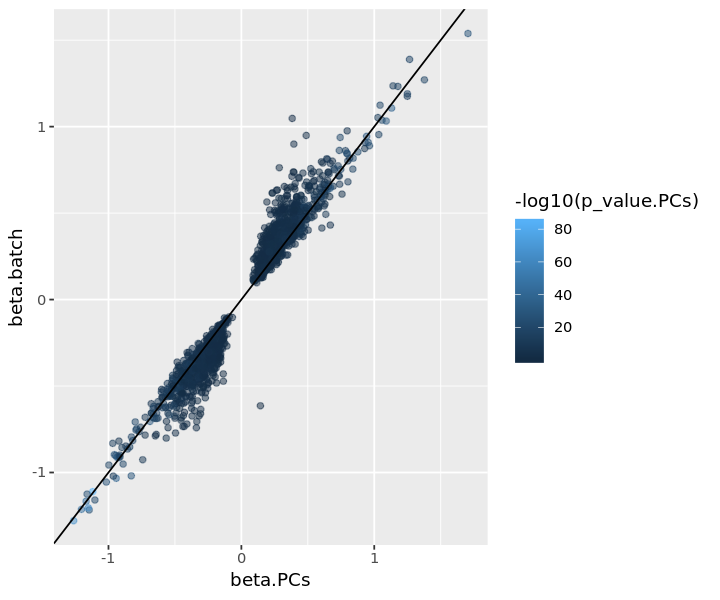

In [64]:
ggplot(df, aes(x = beta.PCs, y = beta.batch, colour = -log10(p_value.PCs))) + geom_point(alpha = 0.5) + geom_abline(intercept = 0)

In [65]:
cor(-log10(df$p_value.PCs), -log10(df$p_value.batch))
cor.test(df$p_value.PCs, df$p_value.batch)

[1] 0.9607719


	Pearson's product-moment correlation

data:  df$p_value.PCs and df$p_value.batch
t = 17.04, df = 1544, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3550402 0.4389997
sample estimates:
      cor 
0.3978526 


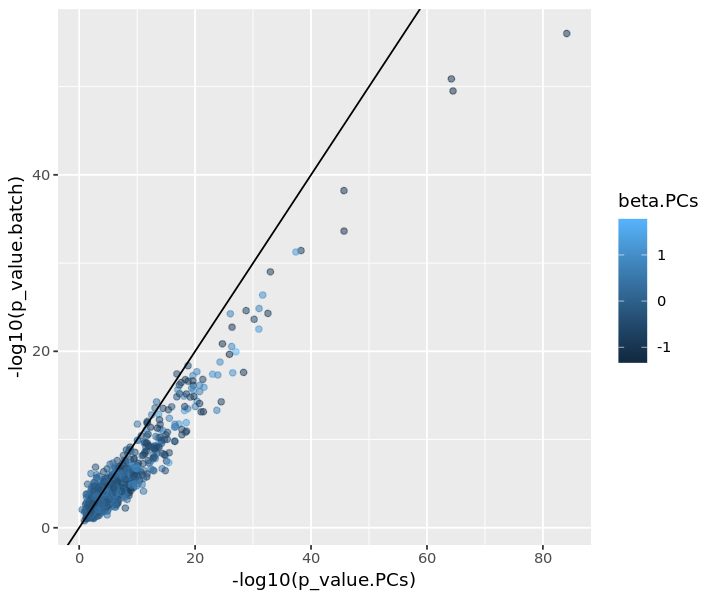

In [66]:
ggplot(df, aes(x = -log10(p_value.PCs), y = -log10(p_value.batch), colour = beta.PCs)) + geom_point(alpha = 0.5) + geom_abline(intercept = 0)

In [44]:
cor(df$beta.PCs, df$beta.batch)
cor.test(df$beta.PCs, df$beta.batch)

[1] 0.9697339


	Pearson's product-moment correlation

data:  df$beta.PCs and df$beta.batch
t = 117.21, df = 871, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9655063 0.9734504
sample estimates:
      cor 
0.9697339 


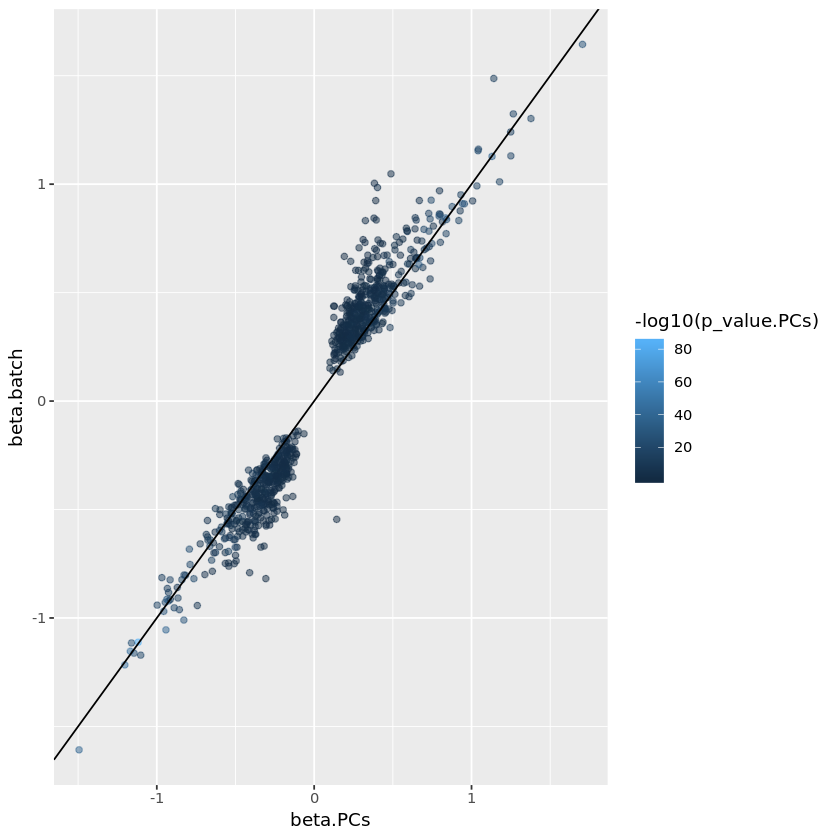

In [45]:
ggplot(df, aes(x = beta.PCs, y = beta.batch, colour = -log10(p_value.PCs))) + geom_point(alpha = 0.5) + geom_abline(intercept = 0)

In [46]:
cor(-log10(df$p_value.PCs), -log10(df$p_value.batch))
# cor.test(df$p_value.PCs, df$p_value.batch)

[1] 0.9416999

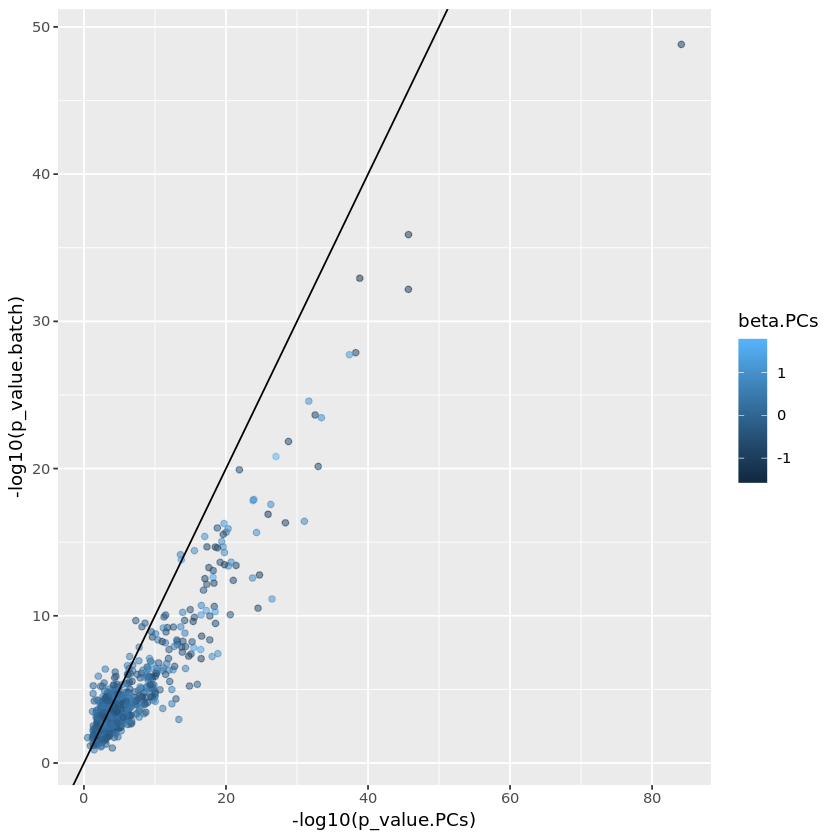

In [47]:
ggplot(df, aes(x = -log10(p_value.PCs), y = -log10(p_value.batch), colour = beta.PCs)) + geom_point(alpha = 0.5) + geom_abline(intercept = 0)